In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
!pip3 install emoji
import emoji
from IPython.core.interactiveshell import InteractiveShell

     |████████████████████████████████| 51kB 2.3MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=6bc101dbc5e02d7c2c01e9e2507c90962fc822ac3a1ab7bef02bb5b63140f0bb
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [3]:
#how many outputs do you want to display for each block?
InteractiveShell.ast_node_interactivity='all'
#InteractiveShell.ast_node_interactivity='last'

#how many output summary rows do you want to display?
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 100)

#how many output summary columns do you want to display?
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 20)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [132]:
raw_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Whatsapp/files/WhatsApp Chat with 100 limites.txt', delimiter='\t', header=None, names=['text'])
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Whatsapp/files/WhatsApp Chat with 100 limites.txt', delimiter='\t', header=None, names=['text'])

In [133]:
data.head()

,text
0,"8/31/20, 10:07 - Mara: Também quero um amigo a..."
1,"8/31/20, 11:45 - Frances Mô: ai fica dificil, ..."
2,"8/31/20, 14:14 - Branco: Quando tu for a uma c..."
3,"Para quem já ouviu falar, mas nunca viu uma Tê..."
4,Sinistro!!!


In [135]:
#extract datetime

data[['datetime_str','text_2']]=data['text'].str.split(' - ', 1, expand=True)
data['datetime']=pd.to_datetime(data['datetime_str'], format='%m/%d/%y, %H:%M', errors='coerce')
data = data.dropna(subset=['datetime'])
data = data.drop(columns=['datetime_str'])

In [136]:
# data.head()
data['datetime'][0].hour

10

In [137]:
data[['sender','text_message']]=data['text_2'].str.split(': ', 1, expand=True)
data = data.dropna(subset=['text_message'])
data = data.drop(columns=['text','text_2'])

In [147]:
data.head()

,datetime,sender,text_message,day_of_week,hour_of_day
0,2020-08-31 10:07:00,Mara,Também quero um amigo assim.,1,10
1,2020-08-31 11:45:00,FrancesM,"ai fica dificil, né...kkkkk",1,11
2,2020-08-31 14:14:00,Branco,"Quando tu for a uma churrascaria e pedir ""aque...",1,14
6,2020-08-31 14:15:00,Branco,<Media omitted>,1,14
7,2020-08-31 20:28:00,BrunoM,<Media omitted>,1,20


In [139]:
#anonimise names
data['first_name']=data['sender'].str.split(' ', expand=True)[0]
data['last_name']=data['sender'].str.split(' ', expand=True)[1]
data['sender']=data['first_name'].where(data['last_name'].isnull(), data['first_name']+''+data['last_name'].str[0])
data=data.drop(columns=['first_name','last_name'])

In [140]:
data.head()

,datetime,sender,text_message
0,2020-08-31 10:07:00,Mara,Também quero um amigo assim.
1,2020-08-31 11:45:00,FrancesM,"ai fica dificil, né...kkkkk"
2,2020-08-31 14:14:00,Branco,"Quando tu for a uma churrascaria e pedir ""aque..."
6,2020-08-31 14:15:00,Branco,<Media omitted>
7,2020-08-31 20:28:00,BrunoM,<Media omitted>


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 2043
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      1781 non-null   datetime64[ns]
 1   sender        1781 non-null   object        
 2   text_message  1781 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 55.7+ KB


Text(0.5, 1.0, 'Dias com mais envio de msg')

Text(0.5, 0, 'hora do dia')

Text(0, 0.5, 'dia da semana')

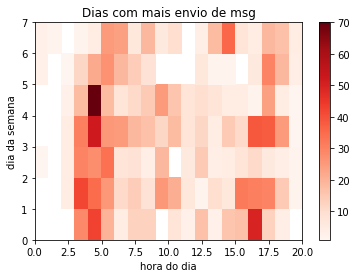

In [144]:
data['day_of_week']=data['datetime'].dt.dayofweek+1
data['hour_of_day']=data['datetime'].dt.hour 

heatmap_data=data.groupby(['day_of_week','hour_of_day']).size()
heatmap_data=heatmap_data.unstack()

plt.pcolor(heatmap_data, cmap='Reds')
plt.title('Dias com mais envio de msg')
plt.xlabel('hora do dia')
plt.ylabel('dia da semana')
plt.colorbar()
plt.show()

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, 'Os que falam mais...')

Text(0.5, 0, 'Membro')

Text(0, 0.5, 'Número de msg')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

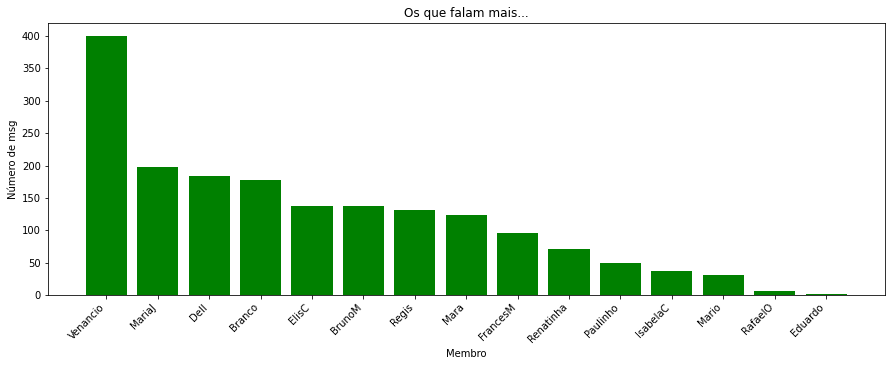

In [165]:
sender_counts_series=data.groupby(['sender']).size().sort_values(ascending=False)
sender_counts_df=pd.DataFrame(sender_counts_series)

sender_counts_df=sender_counts_df.reset_index()
sender_counts_df.columns=['sender','count']

plt.figure(figsize=(15,5))
plt.bar(sender_counts_df['sender'], sender_counts_df['count'], color='green')
plt.title('Os que falam mais...')
plt.xlabel('Membro')
plt.ylabel('Número de msg')
plt.xticks(rotation=45, ha='right')
plt.show()

In [160]:
## Create DataFrame with all words used split by sender
# Filter out 'Media Omitted' messages
data_texts = data[~data['text_message'].str.contains('omitted')]

# Create empty DataFrame to use for the word count
words = pd.DataFrame(columns=['sender','words'])

# Loop through all messages in the DataFrame
for sender, message in zip(data_texts.sender, data_texts.text_message):
 
  # Split out each word in each message
  message_split = message.split()
  for word in message_split:
 
    # Add each word to the DataFrame
    words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)

# Remove punctuation from the start and end of words
words['words'] = words['words'].str.replace('(^\W)|(\W$)','')

# Create list of 'non-words' that we don't care about
non_words = ['o', 'a', 'de', 'e', 'é', 'para', 'por', '', 'no', 'na', 'em', 'attached', 'um', 'uma', 'webp', 'stk', 'file']

# Filter out this list of 'non-words' from each set of words
words_filtered = words[~words['words'].isin(non_words)]

# Create word counts as a series
word_count_total_series = words_filtered.groupby(['words']).size().sort_values(ascending=False)

# Create word counts series as a DataFrame
word_count_total = pd.DataFrame(word_count_total_series)

# Reset index in order to name columns correctly
word_count_total = word_count_total.reset_index()
word_count_total.columns = ['words', 'count']

# Display top 10 words used
word_count_total.head(10)

,words,count
0,dia,223
1,bom,222
2,que,108
3,pessoal,76
4,stk-20200619-wa0008.webp,61
5,parabéns,46
6,obrigado,44
7,do,40
8,deus,39
9,com,39


In [161]:
word_count_total[word_count_total['words'].isin(['camisolão','Bel','cerveja','toma'])]


,words,count
13,camisolão,29
142,cerveja,5


In [156]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Nuvem de palavra do 100 limite')

(-0.5, 399.5, 199.5, -0.5)

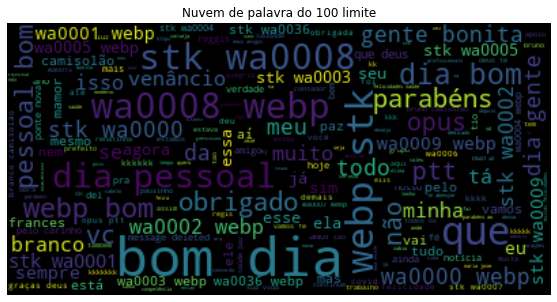

In [166]:
text = [w for w in words_filtered['words']]
full_text = ' '.join(text)

word_cloud = WordCloud(background_color='black', max_font_size=40).generate(full_text)
plt.figure(figsize=(15,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Nuvem de palavra do 100 limite')
plt.axis('off')
plt.show()

<BarContainer object of 20 artists>

Text(0.5, 0, 'Unique Count')

Text(0, 0.5, 'Word')

Text(0.5, 1.0, 'Venancio Word Usage')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0, flags=flags)


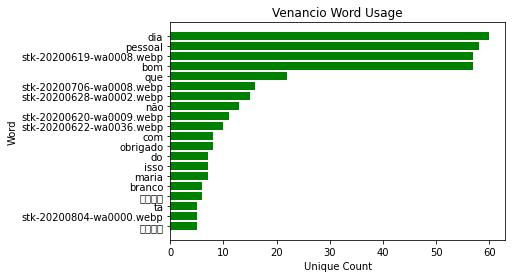

<BarContainer object of 20 artists>

Text(0.5, 0, 'Unique Count')

Text(0, 0.5, 'Word')

Text(0.5, 1.0, 'Branco Word Usage')

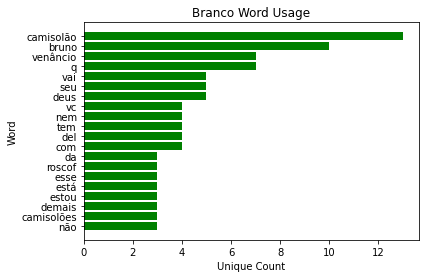

<BarContainer object of 20 artists>

Text(0.5, 0, 'Unique Count')

Text(0, 0.5, 'Word')

Text(0.5, 1.0, 'MariaJ Word Usage')

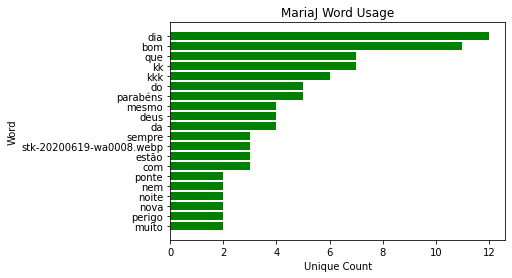

In [163]:
# Create word counts by sender as a series
word_count_by_sender_series = words_filtered.groupby(['sender', 'words']).size().sort_values(ascending=False)

# Create word counts by sender series as a DataFrame
word_count_by_sender = pd.DataFrame(word_count_by_sender_series)

# Reset index in order to name columns correctly
word_count_by_sender = word_count_by_sender.reset_index()
word_count_by_sender.columns = ['sender', 'words', 'count']

# Plot bar chart with top n all words used by me
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Venancio'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Venancio Word Usage")
plt.show()

# Plot bar chart with top n all words used by Alex S
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Branco'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Branco Word Usage")
plt.show()

# Plot bar chart with top n all words used by Chris T
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='MariaJ'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("MariaJ Word Usage")
plt.show()

In [164]:
# Clear DataFrame to create words used
emojis = pd.DataFrame(columns=['sender','emoji','datetime'])

# Loop through all messages in the DataFrame
for sender, message, datetime in zip(data.sender, data.text_message, data.datetime):

  # Split out each word in each message
  message_split = list(message)
 
  # Loop through each word in split message
  for character in message_split:
 
    # If the word is an emoji
    if character in emoji.UNICODE_EMOJI and character != "\U0001f3fc":
 
      # Add each emoji to the DataFrame
      emojis = emojis.append({'sender' : sender, 'emoji' : character, 'datetime' : datetime}, ignore_index=True)

# Display top n most popular emojis
emojis.groupby(['emoji']).size().sort_values(ascending=False).head(10)

emoji
🙏    285
👏    271
🏻    144
🤣     66
😂     41
😘     38
❤     34
🍺     27
🎂     26
🌹     23
dtype: int64